In [13]:
#Adds higher directory to path to access /ATS
import sys
sys.path.append("../")

from ATS.general import *
from ATS.QAQC import *

import pandas as pd

# Set the DataFram in pandas to show all columns and 1000 rows. Display plots inline
pd.options.display.max_columns = None
pd.set_option('display.max_rows', 1000)

# ADD FILTER SO ONLY LOOKING AT PERFORMANCE RECORDS (12/20/2020 Ryan and Roger)

# Load data and subset

<Item title:"SAC_Riparian_Recruitment_RT" type:Feature Layer Collection owner:Anooshi>
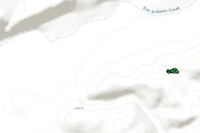

In [14]:
# Load data from arcGIS online
output = arcGIS_data_load('8c1421f4a9bd45709172ce5ee65dccdc')

trees = output['data0']
records = output['table0']

feature_service = output['feature_service']

In [15]:
#Merge related records and feature
data = trees.merge(records, left_on='GlobalID_2', right_on='Ref_to_Trees', how='inner')

data = data.drop(columns=['Ref_to_Trees','GlobalID_2_x'])
data = data.rename(columns={'OBJECTID_1':'PointID','OBJECTID':'RecordID','GlobalID_2_y':'RecordGlobalID'})

In [18]:
# Subset data for desired year.
crtYear = input("Year to run Analysis? (YYYY)")
sub = year_subset(data,crtYear)

Year to run Analysis? (YYYY) 2020

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 169


In [17]:
sub

,PointID,BHR_Site,Tag_Number,Species_Sci,Plot_Number,Habitat_Type,Treatment_Type,SHAPE,RecordID,Observation_Date,Surveyor_1,Surveyor_2,Vigor,Height_Inches,Age_Class,Maintenance_Needed,RecordGlobalID,Comments,Survey_Type
5,1,SAC,316,Quercus lobata,RR2,Willow riparian,Control,"{'x': 6187675.478748217, 'y': 2036893.18112373...",864,2021-08-04 21:02:38,Kurt Lutz,None,Poor,14.25,Sapling,No,5d139204-7d73-4bcc-b100-bffe58917989,2021: Few live leaves remaining. Main stem is ...,Performance
11,2,SAC,317,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187677.11325939, 'y': 2036894.025610223...",765,2020-12-09 20:55:53,Kurt Lutz,None,Not Assessed,NaN,None,No,d8df2640-e315-4085-9f98-9c5cd3c68539,2 QULO seedlings along the outer rim of cage. ...,Maintenance
12,2,SAC,317,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187677.11325939, 'y': 2036894.025610223...",894,2021-08-04 21:04:10,Roger Stephens,None,Poor,17.75,Sapling,No,14f47396-516a-4a91-b338-2a226a31aaec,"2021: Recruit mostly dead, one live leaf remai...",Performance
18,3,SAC,318,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187681.984968811, 'y': 2036893.52068997...",893,2021-08-04 20:57:52,Roger Stephens,None,Good,52.00,Sapling,No,2f49c66a-8452-4660-8893-b8de0d2c6f12,2021: Moderate browsing/leaf dieback from deer...,Performance
24,4,SAC,319,Quercus lobata,RR2,Willow riparian,Control,"{'x': 6187688.516451806, 'y': 2036891.76150713...",863,2021-08-04 20:58:11,Kurt Lutz,None,Dead/Absent,NaN,None,No,3fbf2549-59c0-4e52-afae-d562c6a7c12b,2021: Could not locate recruit nor tag. 2020: ...,Performance
30,5,SAC,320,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187695.820242971, 'y': 2036880.25004722...",892,2021-08-04 20:51:58,Roger Stephens,None,Good,45.00,Sapling,No,523b609d-7603-4675-bc8d-2fdc605ba1cf,"2021: Still some new growth, but some recent s...",Performance
36,6,SAC,321,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187731.409082547, 'y': 2036888.27726213...",774,2020-12-09 20:46:34,Roger Stephens,None,Not Assessed,NaN,None,No,c51b8fab-379f-43b5-9311-917e111e603e,Maintenance survey. Cleared out thatch and rea...,Maintenance
37,6,SAC,321,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187731.409082547, 'y': 2036888.27726213...",891,2021-08-04 20:48:22,Roger Stephens,None,Excellent,34.50,Sapling,No,342bffa4-d358-4df9-8b50-e0fa9ceb3410,2021: Light browsing but healthy growth. Mild ...,Performance
43,7,SAC,323,Quercus agrifolia,RR2,Willow riparian,Control,"{'x': 6187734.686963141, 'y': 2036893.66767130...",861,2021-08-04 20:43:07,Kurt Lutz,None,Excellent,38.50,Sapling,No,73f5c8bb-8b53-4a7f-bbfb-93f4e8e7f172,2021: Minor browsing at the ends of shoots; mo...,Performance
49,8,SAC,322,Quercus lobata,RR2,Willow riparian,Control,"{'x': 6187733.566886634, 'y': 2036891.69523431...",862,2021-08-04 20:47:14,Kurt Lutz,None,Dead/Absent,NaN,None,No,0010f2ba-55b5-47cf-a6c3-b771f665f2b3,2021: Still not found. 2020: Recruit documente...,Performance


# QAQC

In [7]:
# Check domains
validate_domains(feature_service)



Table/Layer:  Observations


The following entries are not within the domain:


,Field,Data
0,Surveyor_1,"{Jon Silva, Lasthenia Lee, Greg Pfau, Ryan Swanson, Janel Mayo, Richard Graham-Bruno}"
0,Surveyor_2,"{Lasthenia Lee, Richard Graham-Bruno, Janel Mayo}"




Table/Layer:  Trees


No Mismatches Found


In [8]:
# Search for whitespaces and extra spaces 
QAQC_whitespace(data, exclude_cols=['Comments'],objectID=['RecordID'])



Analysis for: Maintenance_Needed
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: RecordGlobalID
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Habitat_Type
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Treatment_Type
No \xa0 characters found
No double spaces found
No triple spaces found


No trailing white space found


Analysis for: Vigor
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Age_Class
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Survey_Type
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Surveyor_1
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: SHAPE
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Plot_Number
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: Species_Sci
No \xa0 characters found
No double spaces found
No triple spaces found
No trailing white space found


Analysis for: BHR_Site
No \xa0 characters found
No double spaces found
No tripl

In [9]:
find_blank_entries(data, exclude_cols=['Age_Class','Surveyor_2', 'Comments', 'Height_Inches'])

No blank Maintenance_Needed
No blank Survey_Type
No blank RecordGlobalID
No blank Observation_Date
No blank BHR_Site
No blank Habitat_Type
No blank Treatment_Type
No blank Vigor
No blank Surveyor_1
No blank SHAPE
No blank Plot_Number
No blank Tag_Number
No blank PointID
No blank Species_Sci
No blank RecordID


In [10]:
#QAQC Check number of records matches on ArcGIS online
print('Subset \n# of rows:\n', sub.shape[0])
print('# of columns:\n',sub.shape[1])

Subset 
# of rows:
 150
# of columns:
 19


/home/user/SAC/../ATS/QAQC.py:134: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[plt_r,plt_c].set_xticklabels(r['DateString'], rotation='vertical')


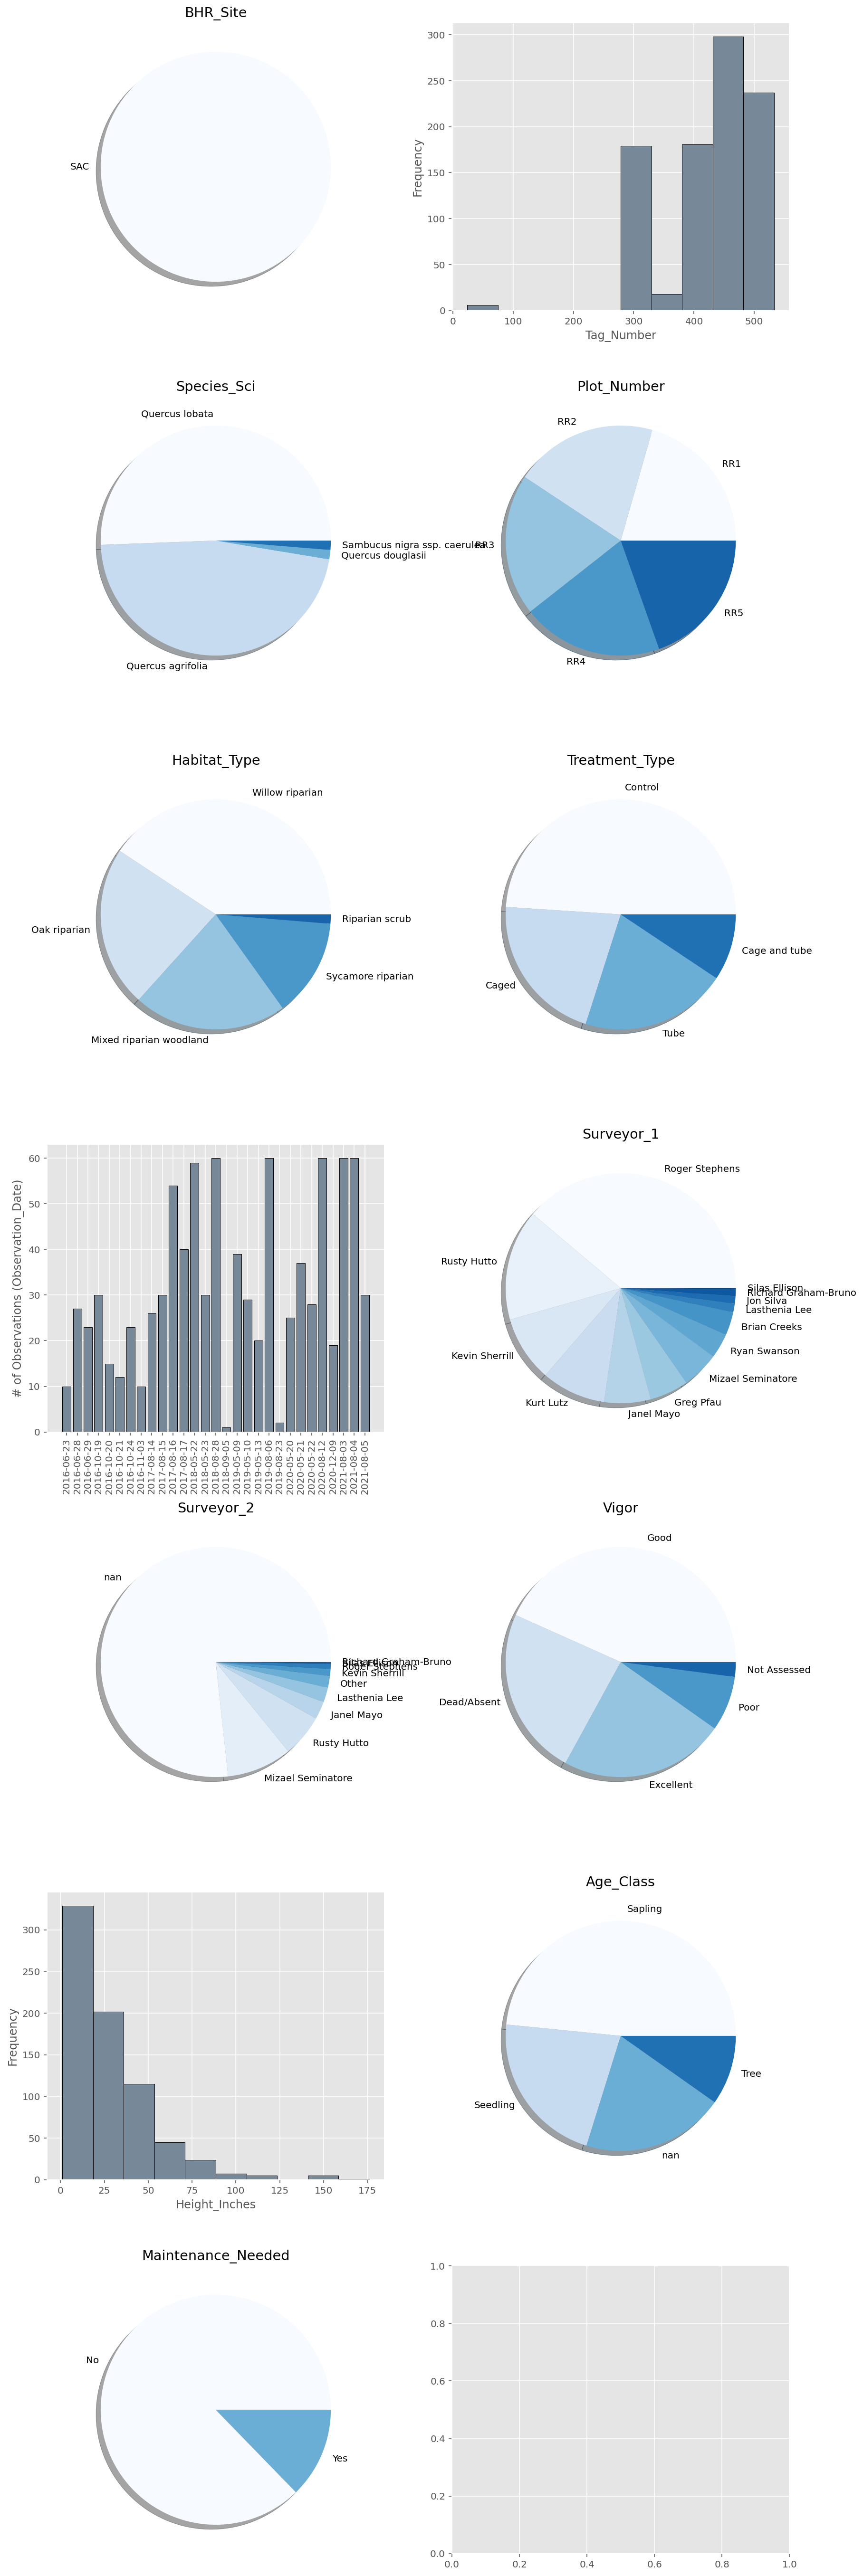

In [11]:
QAQC_plot(data, ['BHR_Site', 'Tag_Number', 'Species_Sci','Plot_Number',
       'Habitat_Type', 'Treatment_Type',
       'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Vigor',
       'Height_Inches', 'Age_Class', 'Maintenance_Needed'])

Height_Inches  Outlier: True
See Outlier Entries Below:


,PointID,BHR_Site,Tag_Number,Species_Sci,Plot_Number,Habitat_Type,Treatment_Type,SHAPE,RecordID,Observation_Date,Surveyor_1,Surveyor_2,Vigor,Height_Inches,Age_Class,Maintenance_Needed,RecordGlobalID,Comments,Survey_Type,Height_Inches_Outlier
117,20,SAC,329,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187782.066133469, 'y': 2036897.8333453983, 'spatialReferenc...",20,2018-05-22 18:55:51,Mizael Seminatore,Rusty Hutto,Excellent,91.00,Tree,Yes,fa711b49-6a7c-4cf8-82cc-b9d4b179fea7,CAPY present inside the cage.,Performance,True
118,20,SAC,329,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187782.066133469, 'y': 2036897.8333453983, 'spatialReferenc...",156,2019-05-09 18:10:39,Mizael Seminatore,Janel Mayo,Excellent,108.00,Tree,Yes,2d7944ce-9e48-4ca4-8cdd-aa743d68da78,CAPY present inside the cage.,Performance,True
119,20,SAC,329,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187782.066133469, 'y': 2036897.8333453983, 'spatialReferenc...",315,2020-05-20 18:48:32,Kevin Sherrill,None,Excellent,145.00,Tree,Yes,ddda4241-3df0-4616-ba18-09e2f714507e,CAPY and non-native grasses in cage present inside the cage.,Performance,True
123,20,SAC,329,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187782.066133469, 'y': 2036897.8333453983, 'spatialReferenc...",889,2021-08-04 20:29:37,Roger Stephens,None,Excellent,157.00,Tree,No,dbacee37-fbe4-4918-9cc1-9f6f805f8e61,2021: Removed thatch around tree. 2020: CAPY and non-native grasse...,Performance,True
136,23,SAC,326,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187769.147852227, 'y': 2036885.482648313, 'spatialReference...",23,2018-05-22 18:36:23,Mizael Seminatore,Rusty Hutto,Good,84.00,Tree,No,79599bcb-f39d-4d99-86be-4876f784cf9b,Evidence of light browsing by herbivores and rodents; CAPY presen...,Performance,True
137,23,SAC,326,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187769.147852227, 'y': 2036885.482648313, 'spatialReference...",174,2019-05-09 17:48:36,Mizael Seminatore,Janel Mayo,Excellent,111.00,Tree,No,5b922c47-f370-41e9-9cc5-7ec1b7f7b749,Evidence of light browsing by herbivores and rodents. Some CAPY pr...,Performance,True
138,23,SAC,326,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187769.147852227, 'y': 2036885.482648313, 'spatialReference...",312,2020-05-20 18:36:44,Kevin Sherrill,None,Excellent,142.00,Tree,No,d8a615c2-b248-4e51-b300-fa22370ecd92,Evidence of light browsing by herbivores and rodents. Some stem di...,Performance,True
141,23,SAC,326,Quercus agrifolia,RR2,Willow riparian,Caged,"{'x': 6187769.147852227, 'y': 2036885.482648313, 'spatialReference...",890,2021-08-04 20:39:17,Roger Stephens,None,Excellent,148.00,Tree,No,ec08e29f-9774-4b07-85f7-fa7a9b213b4a,2021-2020: Evidence of light browsing by herbivores and rodents. S...,Performance,True
181,30,SAC,512,Quercus agrifolia,RR5,Mixed riparian woodland,Cage and tube,"{'x': 6190487.081720799, 'y': 2037846.0240343064, 'spatialReferenc...",373,2020-05-22 17:26:56,Kevin Sherrill,None,Excellent,80.25,Tree,No,6c1a6168-b0a2-448b-9cfe-c27ce0225b84,Lots of new growth. Light insect browsing and a few necrotic leaves.,Performance,True
184,30,SAC,512,Quercus agrifolia,RR5,Mixed riparian woodland,Cage and tube,"{'x': 6190487.081720799, 'y': 2037846.0240343064, 'spatialReferenc...",903,2021-08-05 18:11:40,Kurt Lutz,None,Excellent,80.00,Tree,No,304f3adc-4499-429c-af28-ece76e9ca1bb,"2021: Tree height was estimated due to access trouble, but appears...",Performance,True


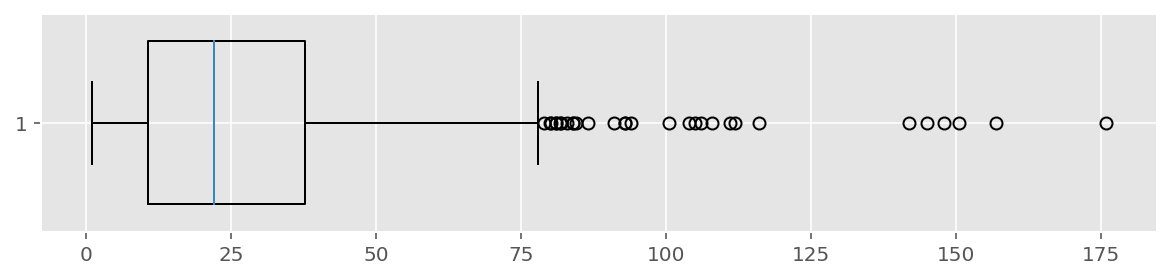

In [12]:
foo = find_outlier(data, ['Height_Inches'])

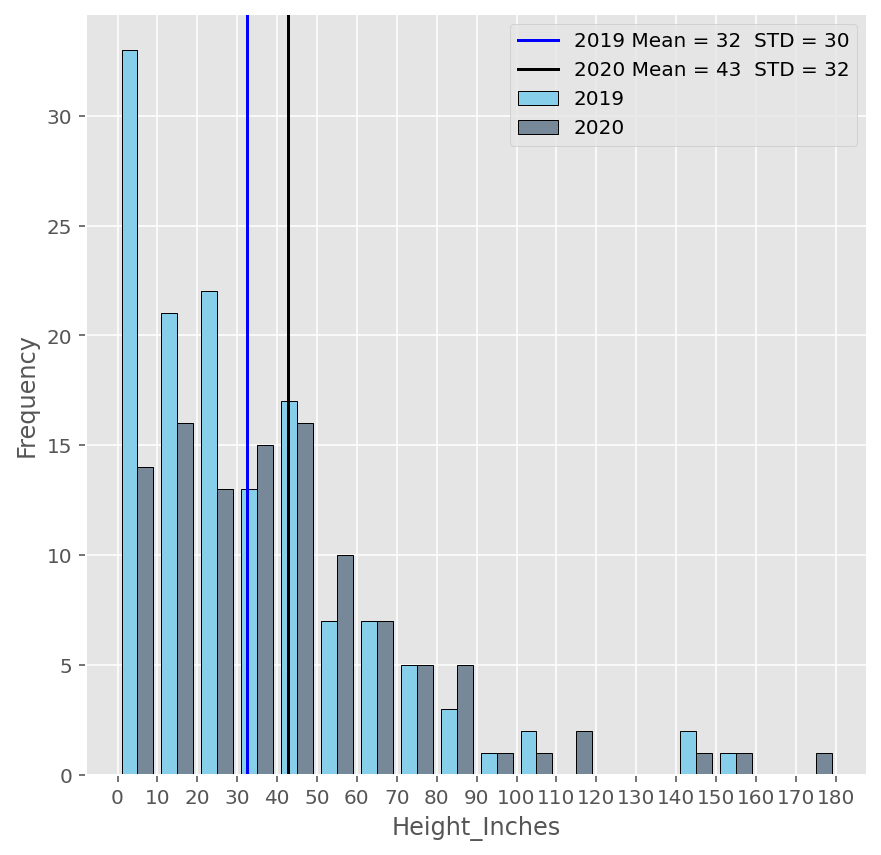

In [13]:
compare_years_continuous(data, 'Height_Inches', '2019', '2020', 10)

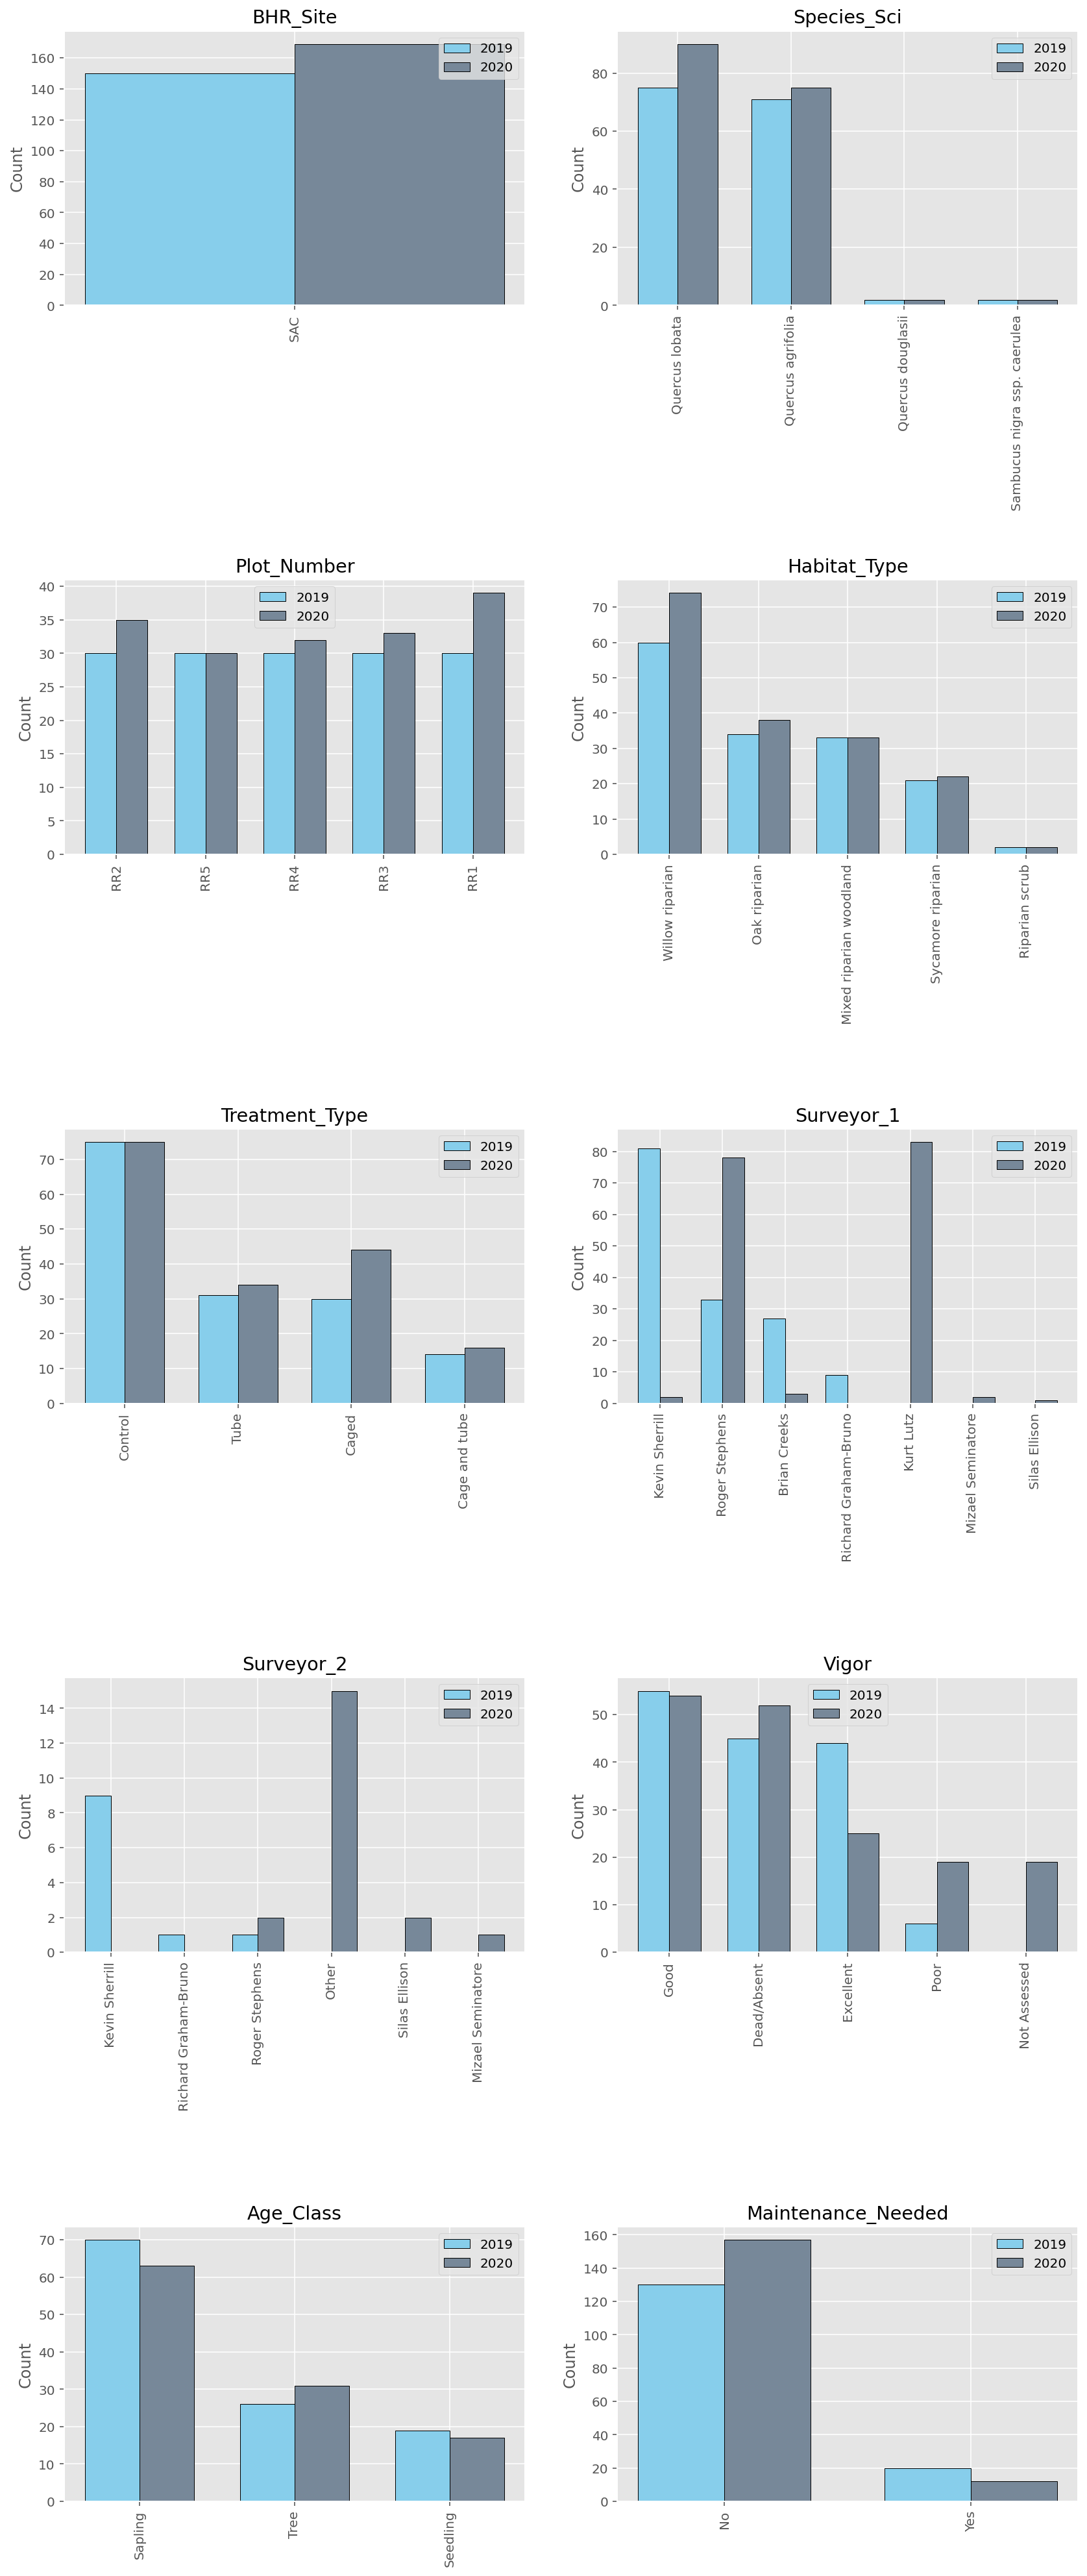

In [14]:
compare_years_catagorical(data,['BHR_Site', 'Species_Sci', 'Plot_Number',
       'Habitat_Type', 'Treatment_Type','Surveyor_1', 'Surveyor_2', 'Vigor',
        'Age_Class', 'Maintenance_Needed'],'2019','2020')

Dropping surveyors with less than 15.0 observations
They did not make over 10% of total observation
Dropping Surveyors: []


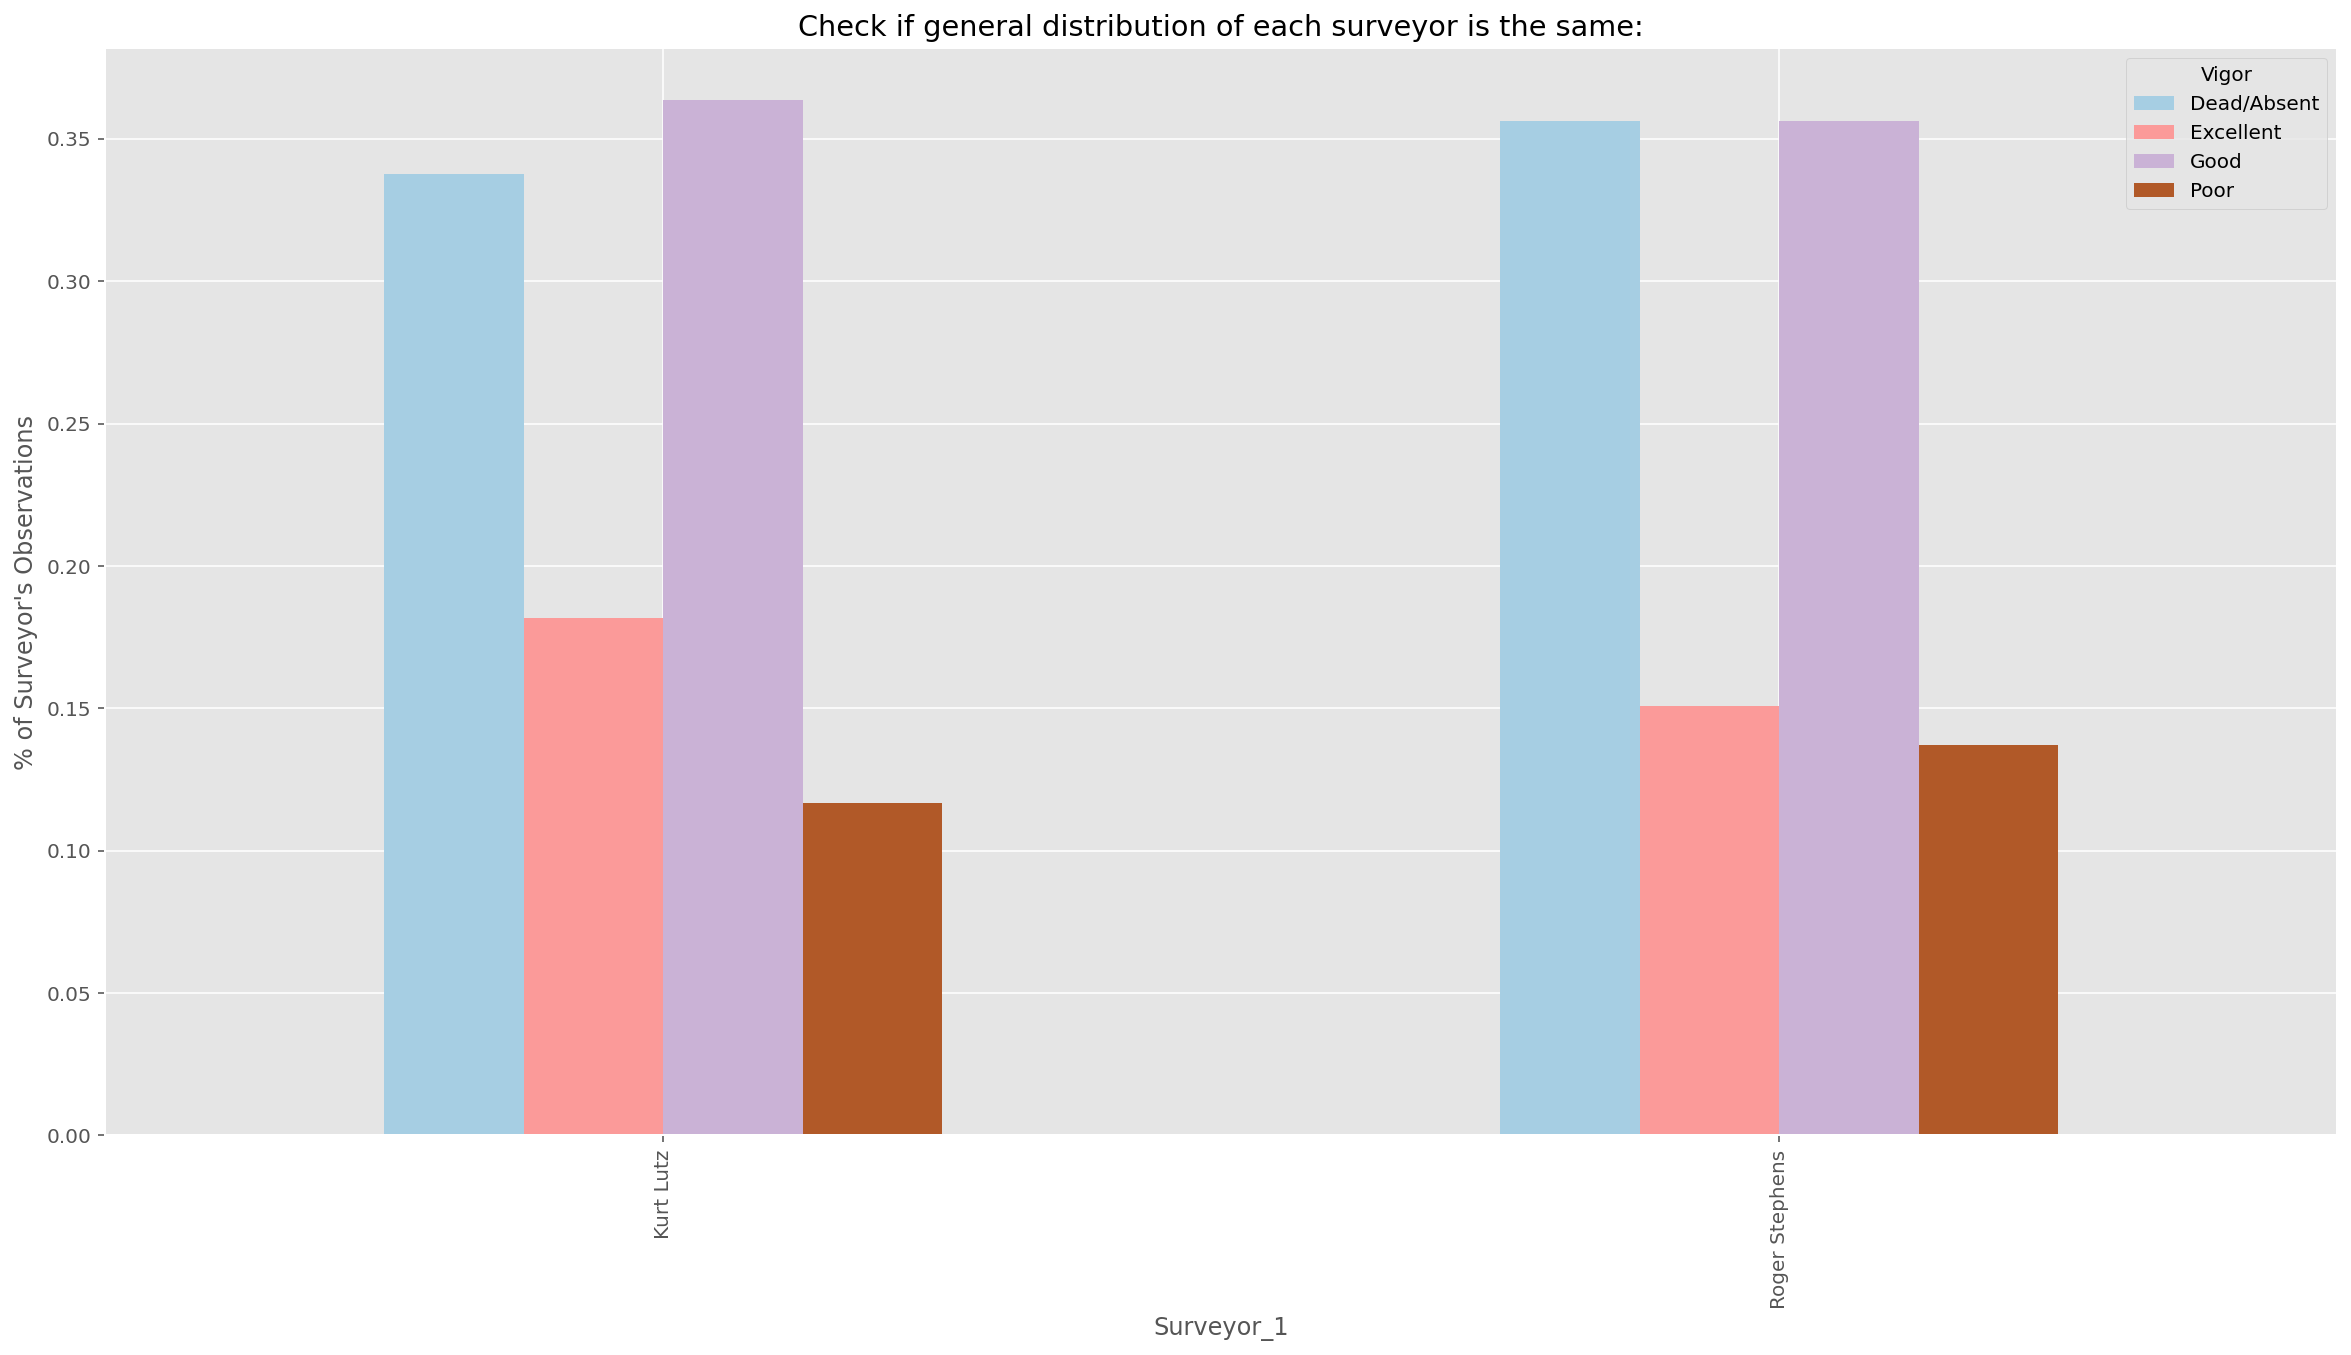

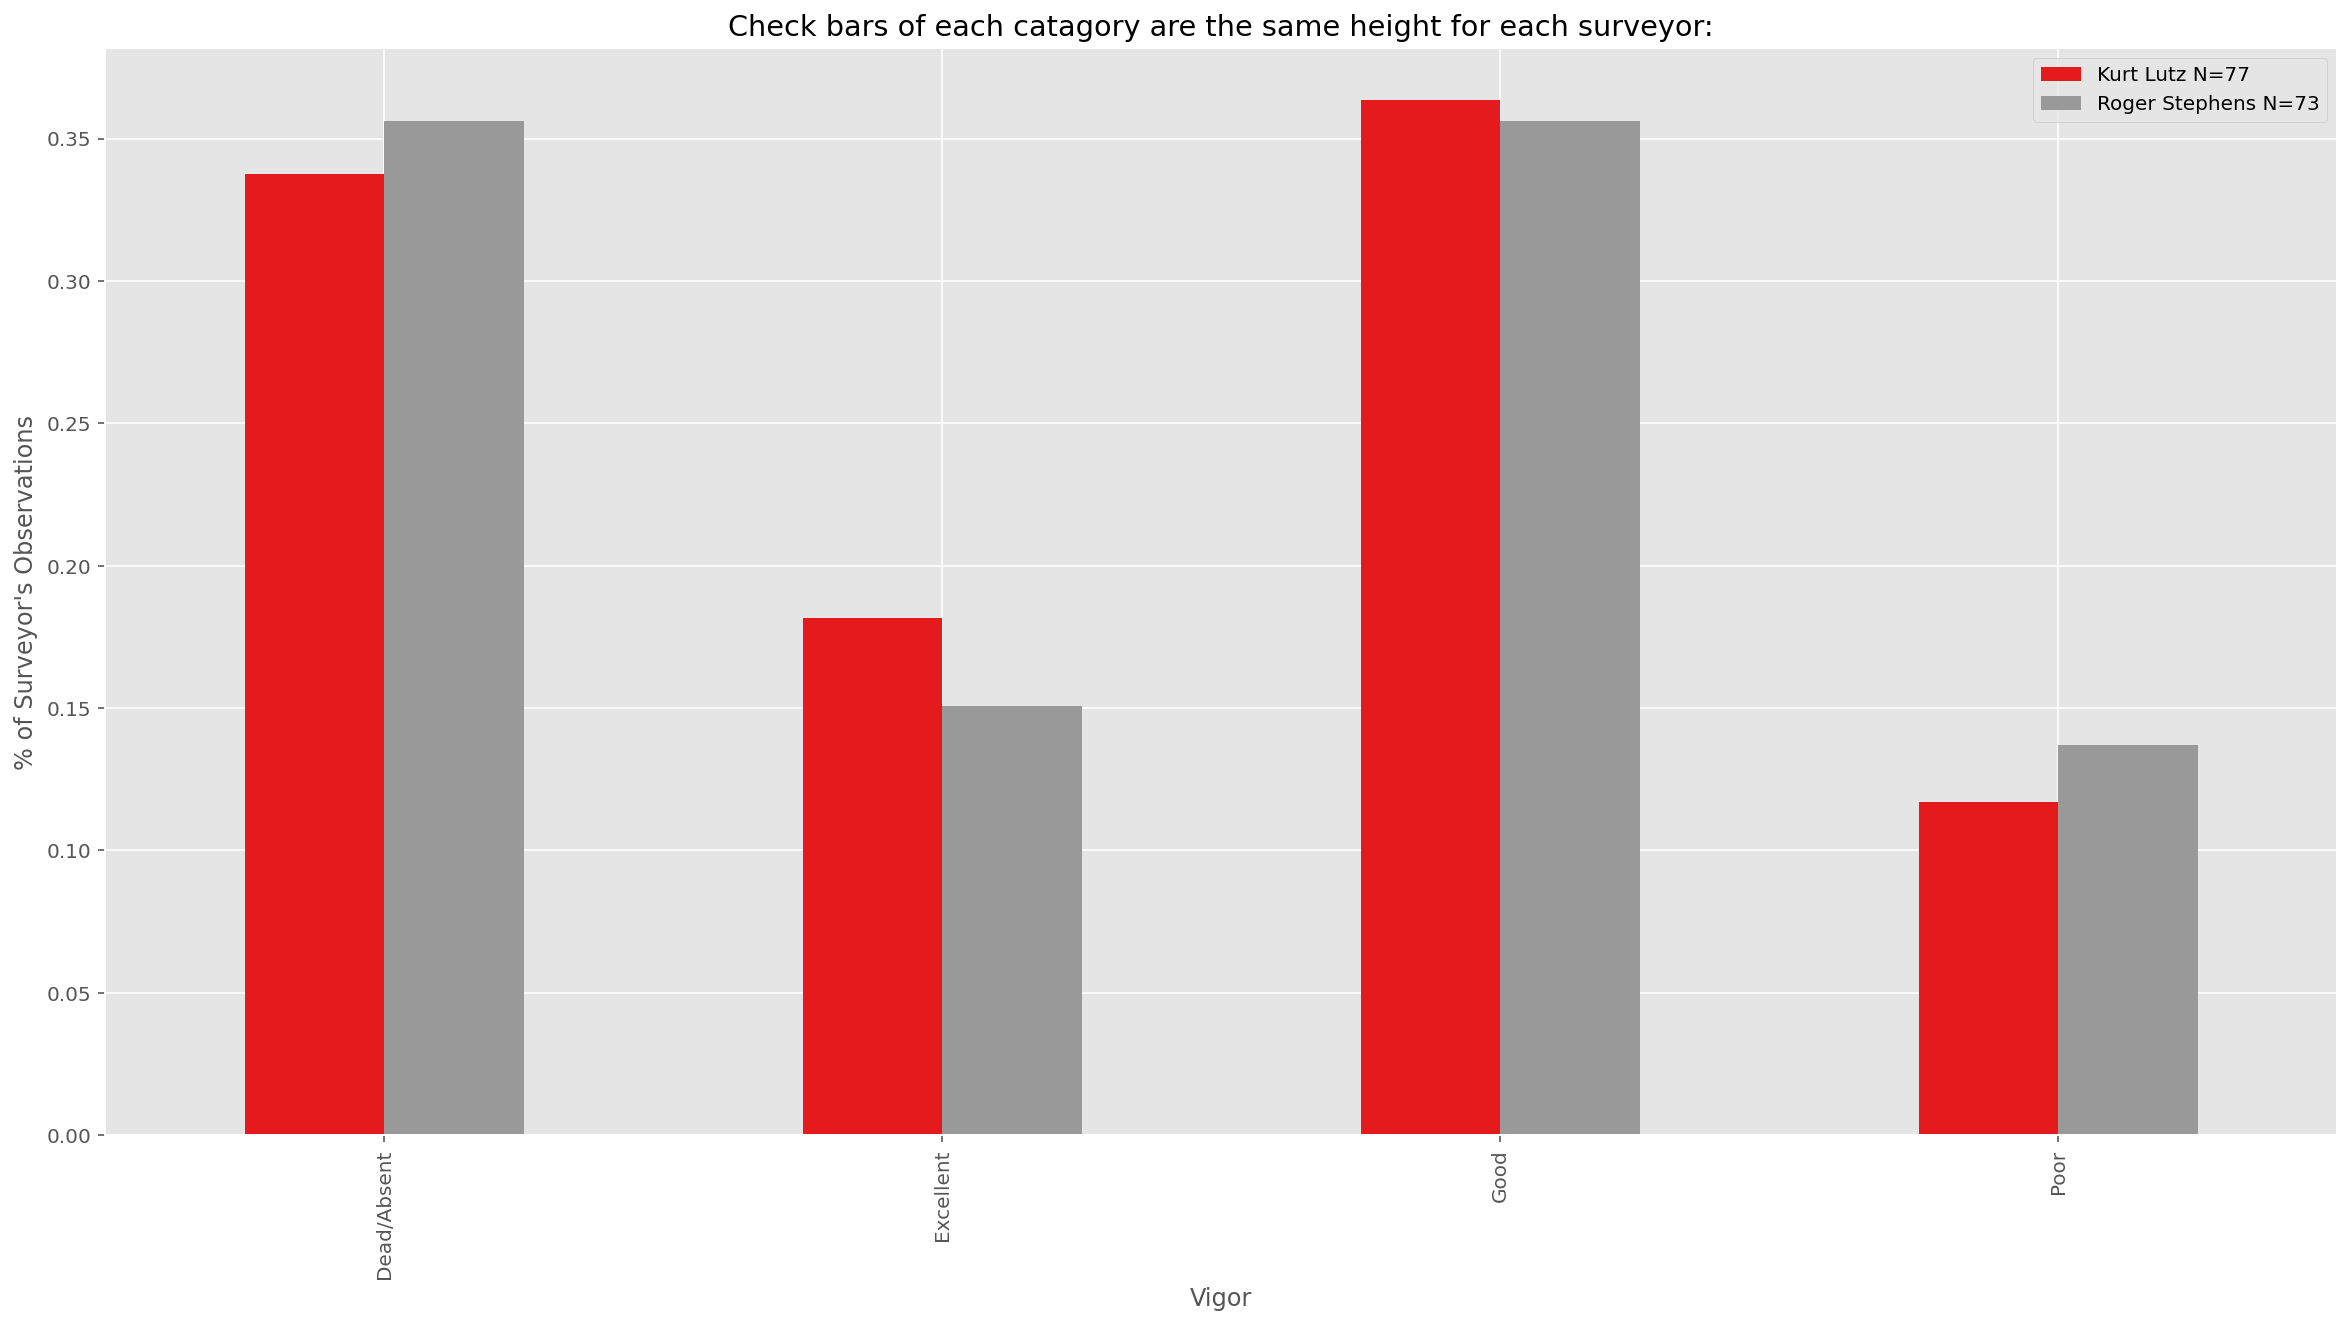

In [15]:
compare_surveyors(sub, 'Vigor', 'Surveyor_1', 10)

In [8]:
#There should not be any 0 entries in the height column
foo = find_entry(data, ['Height_Inches'],[0],'RecordID')

Did not find 0 in Height_Inches


In [9]:
QAQC_attachment_filenames(feature_service)


No attachments for layer/table Trees



No mislabeled photos found for layer/table Observations


In [18]:
# Find any alive entries that don't have a height
result = data.loc[data.Vigor != 'Dead/Absent', 'Height_Inches'].isna().any()

if result:
    print('There are alive trees with no height')
else:
    print('All alive tree heights have height')

There are alive trees with no height


In [10]:
# Check that Age Class has appropriate heights

seedling_R = data.loc[(data.Age_Class == 'Seedling') & (data.Height_Inches >= 11.8),]
if not seedling_R.empty:
    print('ERROR: Seedling entries with height >= 11.8 in:')
    display(seedling_R)
else:
    print('All seedling entries have a height less than 11.8 in')

sapling_R = data.loc[(data.Age_Class == 'Sapling') & ((data.Height_Inches < 11.8)|(data.Height_Inches >= 52.8)),]
if not sapling_R.empty:
    print('ERROR: Sapling entries with height <= 11.8 in or > 52.8 in:')
    display(sapling_R)
else:
    print('All sapling entries have a height >= 11.8 in and < 52.8 in')
    
tree_R = data.loc[(data.Age_Class == 'Tree') & (data.Height_Inches < 52.8),]
if not tree_R.empty:
    print('ERROR: Tree entries with height < 52.8 in:')
    display(tree_R)
else:
    print('All tree entries have a height >= 52.8 in')

All seedling entries have a height less than 11.8 in
All sapling entries have a height >= 11.8 in and < 52.8 in
All tree entries have a height >= 52.8 in


# Results

In [11]:
data['Enhancement'] = 'Control'
data.loc[data.Treatment_Type.isin(['Caged','Cage and tube', 'Tube']),'Enhancement'] = 'Enhanced'

In [12]:
# Get current year's data ( 'crtYear' is set in data subset cell above)
curYear = year_subset(data, crtYear)

Analysis for 2020-10-01 07:00 UTC to 2021-10-01 07:00 UTC
Entries in Subset: 169


In [13]:
# Get previous years's data
preYear = str(int(crtYear) - 1)
prevYear = year_subset(data, preYear)

Analysis for 2019-10-01 07:00 UTC to 2020-10-01 07:00 UTC
Entries in Subset: 150


In [14]:
# Get baseline year data
baseYear = data.loc[data.Observation_Date <"2016-12-01",:]
print('Entries in Subset:',len(baseYear))

Entries in Subset: 150


In [15]:
curYear = curYear.set_index(['Treatment_Type','Tag_Number']).sort_index()
prevYear = prevYear.set_index(['Treatment_Type','Tag_Number']).sort_index()
baseYear = baseYear.set_index(['Treatment_Type','Tag_Number']).sort_index()

## Change in height - previous year to current year

Height_Inches  Outlier: True
See Outlier Entries Below:


Height_Inches  Height_Inches_Outlier
Treatment_Type Tag_Number                                      
Cage and tube  441                 25.50                   True
               465                 22.00                   True
               476                 26.75                   True
Caged          301                 23.00                   True
               402                 17.00                   True
               531                 36.50                   True
Control        530                 17.50                   True
Tube           462                -11.75                   True

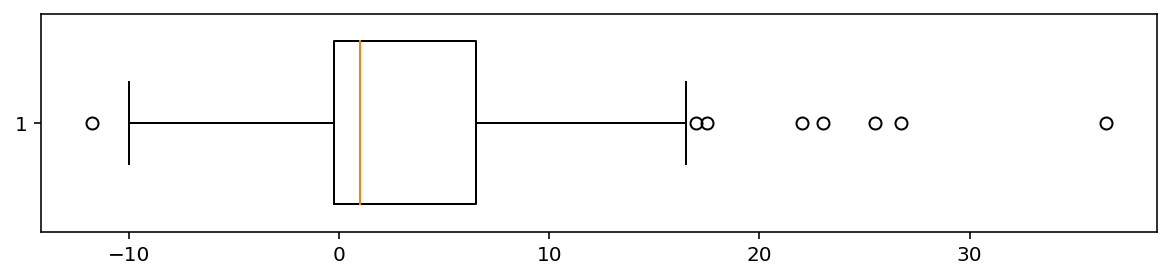

In [16]:
height_diff = curYear.Height_Inches - prevYear.Height_Inches
height_diff = pd.DataFrame(height_diff)
foo = find_outlier(height_diff, ['Height_Inches'])

## Change in height - base year to current year

In [17]:
height_diff_base = curYear.Height_Inches - baseYear.Height_Inches
height_diff_base = pd.DataFrame(height_diff_base)

In [27]:
data.Treatment_Type.unique()

array(['Control', 'Caged', 'Cage and tube', 'Tube'], dtype=object)

Text(0, 0.5, 'Frequency')

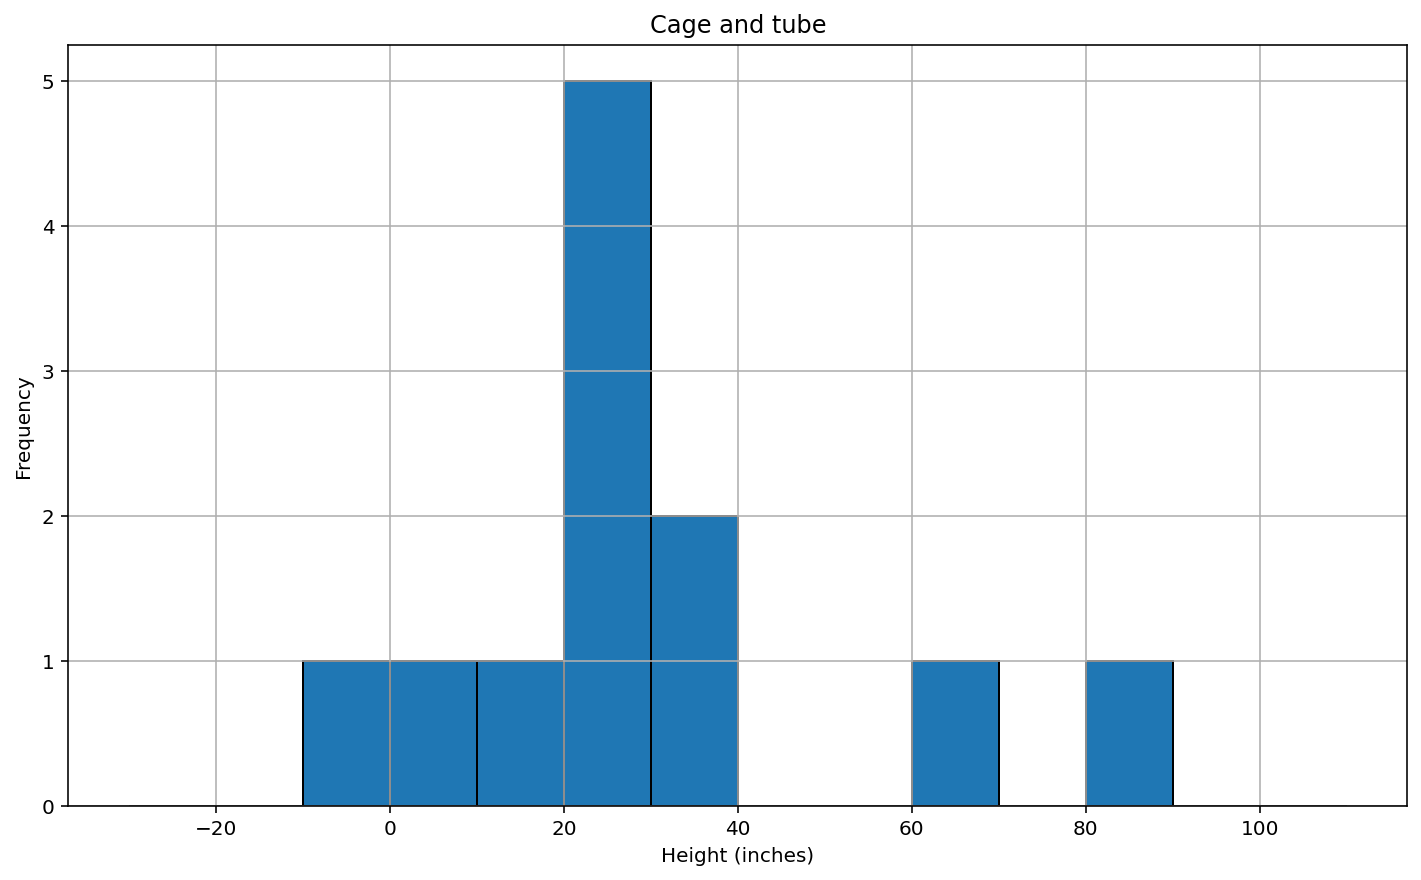

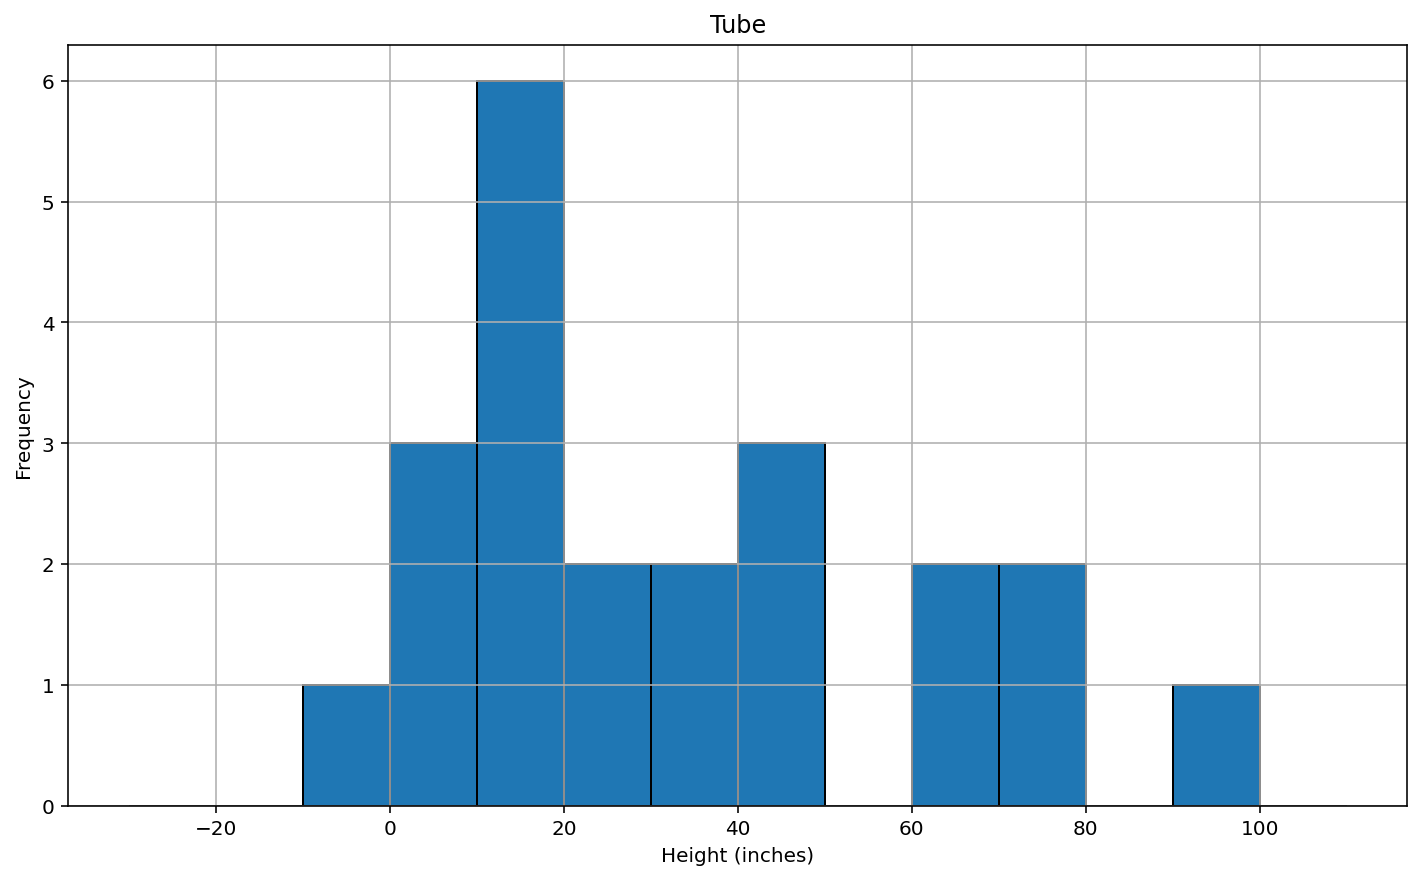

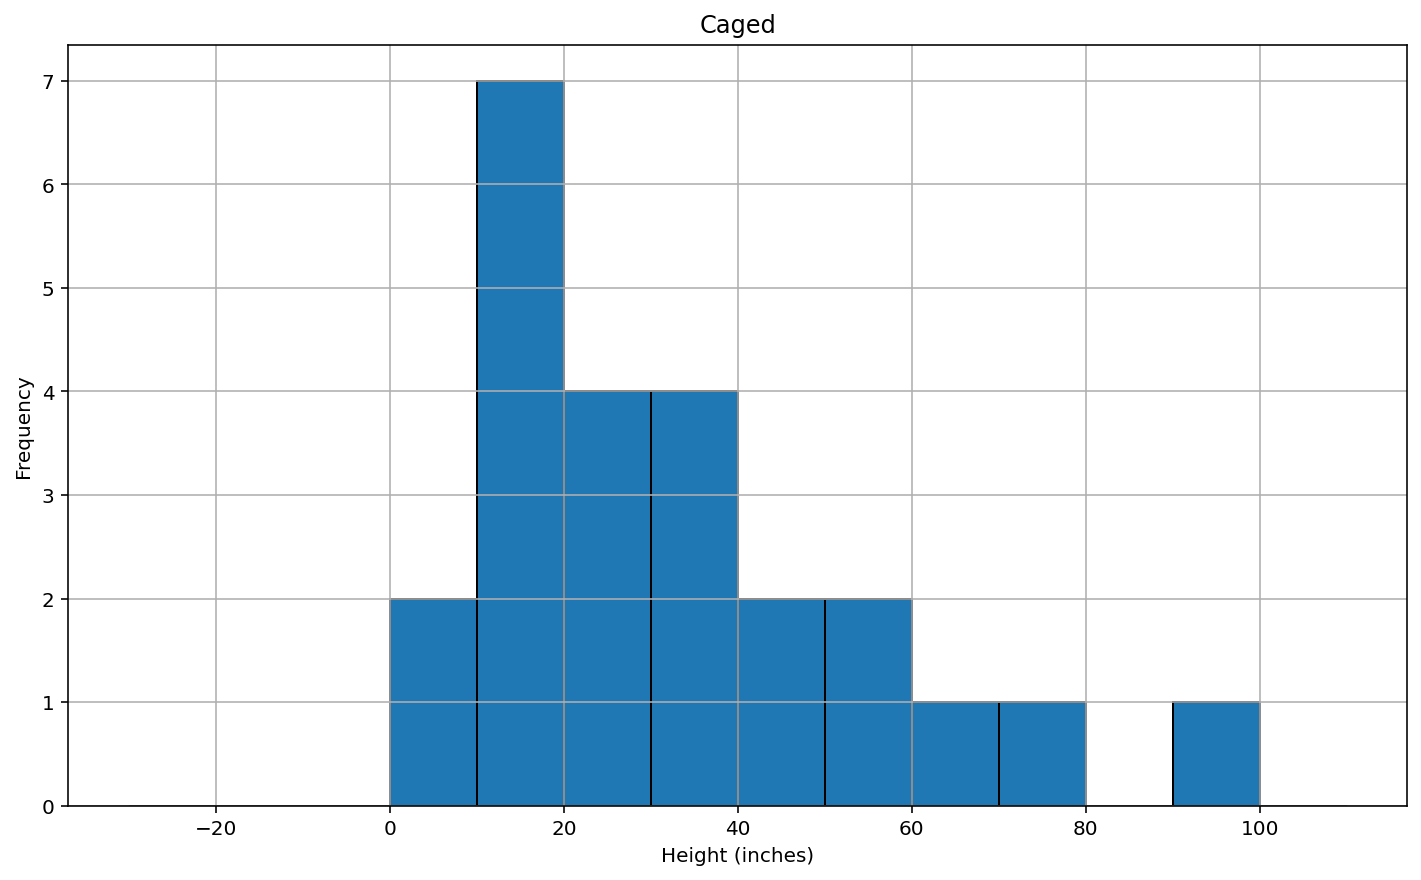

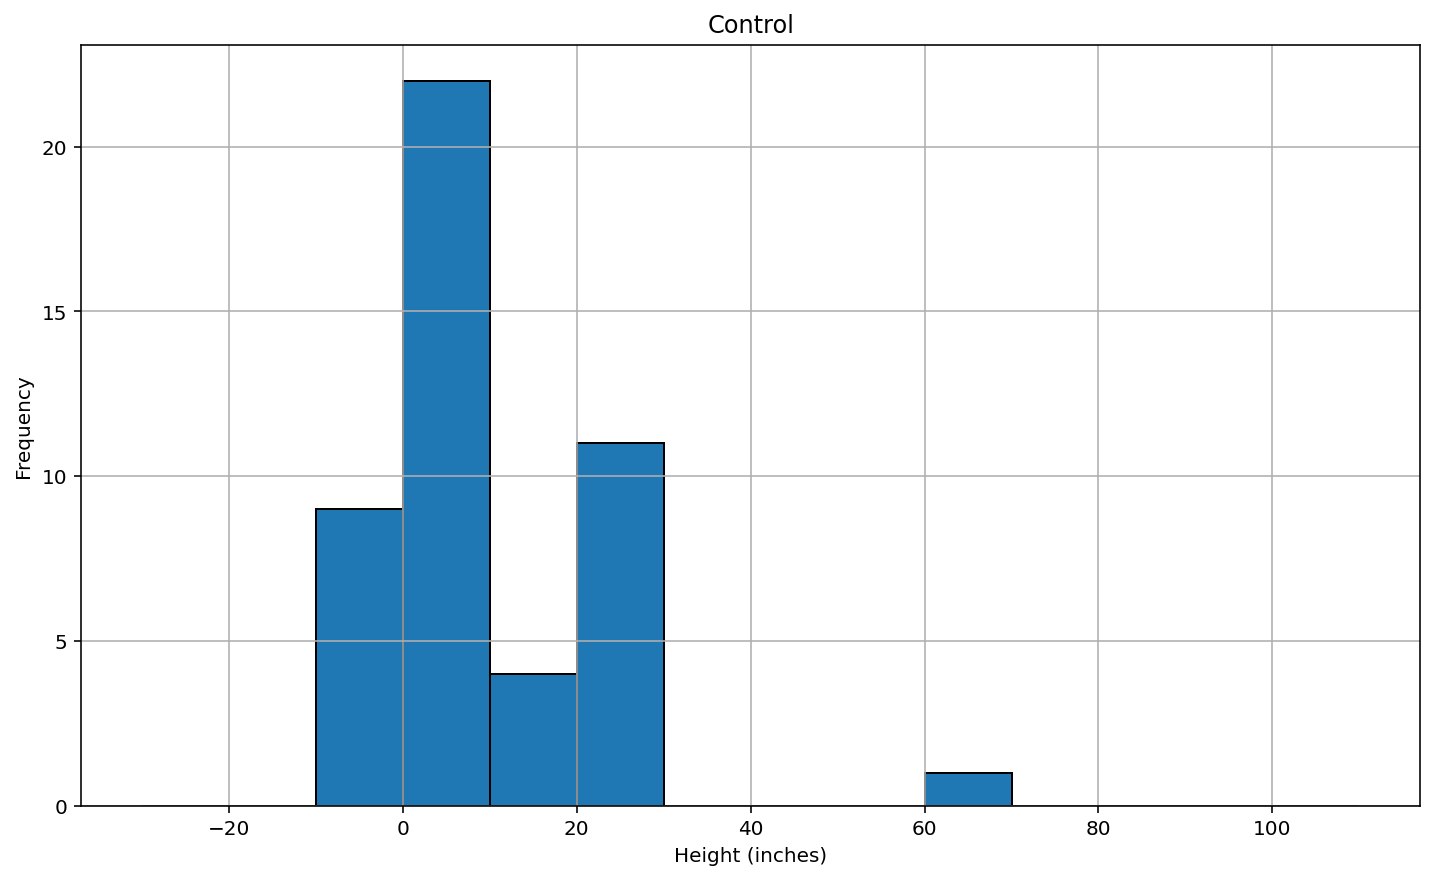

In [18]:
mbins = np.arange(-30,120,10)

height_diff_base.xs('Cage and tube').hist(bins=mbins, edgecolor='black')
plt.title('Cage and tube')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

height_diff_base.xs('Tube').hist(bins=mbins, edgecolor='black')
plt.title('Tube')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

height_diff_base.xs('Caged').hist(bins=mbins, edgecolor='black')
plt.title('Caged')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

height_diff_base.xs('Control').hist(bins=mbins, edgecolor='black')
plt.title('Control')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')

## Change in Vigor - current year to previous year

In [19]:
#Create vigor change dataframe
vigor_change = pd.concat([curYear.Enhancement, prevYear.Vigor, curYear.Vigor], axis=1)

vigor_change.columns=['Enhancement','PrevYear_Vigor','CurYear_Vigor']

In [20]:
#Create change column
def custom_rating(prev, cur):
    if prev == cur:
        return 'No Change'
    else:
        return (prev + ' --> ' + cur)
        
vigor_change['Change'] = vigor_change.apply(lambda x: custom_rating(x['PrevYear_Vigor'],x['CurYear_Vigor']),axis=1)

In [21]:
#QAQC ITEM: phantom trees.
results = vigor_change.loc[vigor_change.Change.isin(['Dead/Absent --> Excellent','Dead/Absent --> Good','Dead/Absent --> Poor']),:]

if results.empty:
    print('No trees were dead last year and are now alive this year')
else:
    print('ERROR: Trees that were dead last year that are now alive:')
    display(results)

No trees were dead last year and are now alive this year


In [22]:
# of observations that changed
change_tally = vigor_change.groupby(['Change']).Change.count()

print('# of recruits that changed from:')
print(change_tally.to_string())

# of recruits that changed from:
Change
Excellent --> Dead/Absent       2
Excellent --> Good             19
Excellent --> Not Assessed     10
Excellent --> Poor              4
Good --> Dead/Absent            5
Good --> Excellent              6
Good --> Not Assessed           8
Good --> Poor                  11
No Change                     101
Poor --> Good                   2
Poor --> Not Assessed           1


In [23]:
#Percent of observations broken down by change type
change_pct = change_tally / len(vigor_change)

print('% of recruits that changed from:')
print((change_pct*100).round(1).to_string())

% of recruits that changed from:
Change
Excellent --> Dead/Absent      1.2
Excellent --> Good            11.2
Excellent --> Not Assessed     5.9
Excellent --> Poor             2.4
Good --> Dead/Absent           3.0
Good --> Excellent             3.6
Good --> Not Assessed          4.7
Good --> Poor                  6.5
No Change                     59.8
Poor --> Good                  1.2
Poor --> Not Assessed          0.6


In [24]:
# of observations that changed - grouped by enhancement
change_tally = vigor_change.groupby(['Enhancement','Change']).Change.count()

print('# of recruits that changed from:')
print(change_tally.to_string())

# of recruits that changed from:
Enhancement  Change                    
Control      Excellent --> Good             9
             Good --> Dead/Absent           5
             Good --> Excellent             3
             Good --> Poor                  5
             No Change                     53
Enhanced     Excellent --> Dead/Absent      2
             Excellent --> Good            10
             Excellent --> Not Assessed    10
             Excellent --> Poor             4
             Good --> Excellent             3
             Good --> Not Assessed          8
             Good --> Poor                  6
             No Change                     48
             Poor --> Good                  2
             Poor --> Not Assessed          1


In [25]:
vigor_change.groupby('Enhancement').Enhancement.count()

Enhancement
Control     75
Enhanced    94
Name: Enhancement, dtype: int64

In [26]:
#Percent of observations broken down by change type
change_pct = change_tally / vigor_change.groupby('Enhancement').Enhancement.count()

print('% of recruits that changed from:')
print((change_pct*100).round(1).to_string())

% of recruits that changed from:
Enhancement  Change                    
Control      Excellent --> Good            12.0
             Good --> Dead/Absent           6.7
             Good --> Excellent             4.0
             Good --> Poor                  6.7
             No Change                     70.7
Enhanced     Excellent --> Dead/Absent      2.1
             Excellent --> Good            10.6
             Excellent --> Not Assessed    10.6
             Excellent --> Poor             4.3
             Good --> Excellent             3.2
             Good --> Not Assessed          8.5
             Good --> Poor                  6.4
             No Change                     51.1
             Poor --> Good                  2.1
             Poor --> Not Assessed          1.1


## Change in Age Class - from last year to this year

In [27]:
#Create age change dataframe
age_change = pd.concat([curYear.Enhancement, prevYear.Age_Class, curYear.Age_Class], axis=1)
age_change.columns=['Enhancement','PrevYear_Age','CurYear_Age']

In [28]:
#Convert blank age entries to 'Dead/Absent'
age_change.loc[age_change.PrevYear_Age.isna(),'PrevYear_Age'] = 'Dead/Absent'
age_change.loc[age_change.CurYear_Age.isna(),'CurYear_Age'] = 'Dead/Absent'

In [29]:
#Create change column
age_change['Change'] = age_change.apply(lambda x: custom_rating(x['PrevYear_Age'],x['CurYear_Age']),axis=1)

In [30]:
# of observations that changed
change_tally = age_change.groupby(['Change']).Change.count()

print('# of recruits that changed from:')
print(change_tally.to_string())

# of recruits that changed from:
Change
No Change                   138
Sapling --> Dead/Absent      17
Sapling --> Seedling          1
Sapling --> Tree              5
Seedling --> Dead/Absent      1
Seedling --> Sapling          2
Tree --> Dead/Absent          5


In [31]:
#Percent of observations broken down by change type
change_pct = change_tally / len(age_change)

print('% of recruits that changed from:')
print((change_pct*100).round(1).to_string())

% of recruits that changed from:
Change
No Change                   81.7
Sapling --> Dead/Absent     10.1
Sapling --> Seedling         0.6
Sapling --> Tree             3.0
Seedling --> Dead/Absent     0.6
Seedling --> Sapling         1.2
Tree --> Dead/Absent         3.0


In [32]:
# of observations that changed - grouped by enhancement
change_tally_grouped = age_change.groupby(['Enhancement','Change']).Change.count()

print('# of recruits that changed from:')
print(change_tally_grouped.to_string())

# of recruits that changed from:
Enhancement  Change                  
Control      No Change                   68
             Sapling --> Dead/Absent      2
             Sapling --> Seedling         1
             Sapling --> Tree             1
             Seedling --> Dead/Absent     1
             Seedling --> Sapling         2
Enhanced     No Change                   70
             Sapling --> Dead/Absent     15
             Sapling --> Tree             4
             Tree --> Dead/Absent         5


In [33]:
age_change.groupby('Enhancement').Enhancement.count()

Enhancement
Control     75
Enhanced    94
Name: Enhancement, dtype: int64

In [34]:
#Percent of observations broken down by change type
change_pct = change_tally_grouped / age_change.groupby('Enhancement').Enhancement.count()

print('% of recruits that changed from:')
print((change_pct*100).round(1).to_string())

% of recruits that changed from:
Enhancement  Change                  
Control      No Change                   90.7
             Sapling --> Dead/Absent      2.7
             Sapling --> Seedling         1.3
             Sapling --> Tree             1.3
             Seedling --> Dead/Absent     1.3
             Seedling --> Sapling         2.7
Enhanced     No Change                   74.5
             Sapling --> Dead/Absent     16.0
             Sapling --> Tree             4.3
             Tree --> Dead/Absent         5.3


## Change in Age Class - baseline to current year

In [35]:
#Create age change dataframe
age_change = pd.concat([curYear.Enhancement, baseYear.Age_Class, curYear.Age_Class], axis=1)
age_change.columns=['Enhancement','baseYear_Age','CurYear_Age']

In [36]:
#Convert blank age entries to 'Dead/Absent'
age_change.loc[age_change.baseYear_Age.isna(),'PrevYear_Age'] = 'Dead/Absent'
age_change.loc[age_change.CurYear_Age.isna(),'CurYear_Age'] = 'Dead/Absent'

In [37]:
#Create change column
age_change['Change'] = age_change.apply(lambda x: custom_rating(x['baseYear_Age'],x['CurYear_Age']),axis=1)

In [38]:
# of observations that changed
change_tally = age_change.groupby(['Change']).Change.count()

print('# of recruits that changed from:')
print(change_tally.to_string())

# of recruits that changed from:
Change
No Change                   56
Sapling --> Dead/Absent     17
Sapling --> Seedling         2
Sapling --> Tree            26
Seedling --> Dead/Absent    41
Seedling --> Sapling        22
Seedling --> Tree            5


In [39]:
#Percent of observations broken down by change type
change_pct = change_tally / len(age_change)

print('% of recruits that changed from:')
print((change_pct*100).round(1).to_string())

% of recruits that changed from:
Change
No Change                   33.1
Sapling --> Dead/Absent     10.1
Sapling --> Seedling         1.2
Sapling --> Tree            15.4
Seedling --> Dead/Absent    24.3
Seedling --> Sapling        13.0
Seedling --> Tree            3.0


In [40]:
# of observations that changed - grouped by enhancement
change_tally_grouped = age_change.groupby(['Enhancement','Change']).Change.count()

print('# of recruits that changed from:')
print(change_tally_grouped.to_string())

# of recruits that changed from:
Enhancement  Change                  
Control      No Change                   37
             Sapling --> Dead/Absent      5
             Sapling --> Seedling         2
             Sapling --> Tree             4
             Seedling --> Dead/Absent    20
             Seedling --> Sapling         7
Enhanced     No Change                   19
             Sapling --> Dead/Absent     12
             Sapling --> Tree            22
             Seedling --> Dead/Absent    21
             Seedling --> Sapling        15
             Seedling --> Tree            5


In [41]:
age_change.groupby('Enhancement').Enhancement.count()

Enhancement
Control     75
Enhanced    94
Name: Enhancement, dtype: int64

In [42]:
#Percent of observations broken down by change type
change_pct = change_tally_grouped / age_change.groupby('Enhancement').Enhancement.count()

print('% of recruits that changed from:')
print((change_pct*100).round(1).to_string())

% of recruits that changed from:
Enhancement  Change                  
Control      No Change                   49.3
             Sapling --> Dead/Absent      6.7
             Sapling --> Seedling         2.7
             Sapling --> Tree             5.3
             Seedling --> Dead/Absent    26.7
             Seedling --> Sapling         9.3
Enhanced     No Change                   20.2
             Sapling --> Dead/Absent     12.8
             Sapling --> Tree            23.4
             Seedling --> Dead/Absent    22.3
             Seedling --> Sapling        16.0
             Seedling --> Tree            5.3


In [43]:
#control 
4 + 9.3



13.3

In [44]:
#Enhanced
24 + 21.3 + 6.7

52.0

In [55]:
#Enhanced minus control - the effect
# Enahancement improve succession by 38.7%
52-13.3

38.7

## Other Results

In [10]:
sub

,PointID,BHR_Site,Tag_Number,Species_Sci,Plot_Number,Habitat_Type,Treatment_Type,SHAPE,RecordID,Observation_Date,Surveyor_1,Surveyor_2,Vigor,Height_Inches,Age_Class,Maintenance_Needed,RecordGlobalID,Comments,Survey_Type
5,1,SAC,316,Quercus lobata,RR2,Willow riparian,Control,"{'x': 6187675.478748217, 'y': 2036893.18112373...",864,2021-08-04 21:02:38,Kurt Lutz,None,Poor,14.25,Sapling,No,5d139204-7d73-4bcc-b100-bffe58917989,2021: Few live leaves remaining. Main stem is ...,Performance
11,2,SAC,317,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187677.11325939, 'y': 2036894.025610223...",765,2020-12-09 20:55:53,Kurt Lutz,None,Not Assessed,NaN,None,No,d8df2640-e315-4085-9f98-9c5cd3c68539,2 QULO seedlings along the outer rim of cage. ...,Maintenance
12,2,SAC,317,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187677.11325939, 'y': 2036894.025610223...",894,2021-08-04 21:04:10,Roger Stephens,None,Poor,17.75,Sapling,No,14f47396-516a-4a91-b338-2a226a31aaec,"2021: Recruit mostly dead, one live leaf remai...",Performance
18,3,SAC,318,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187681.984968811, 'y': 2036893.52068997...",893,2021-08-04 20:57:52,Roger Stephens,None,Good,52.00,Sapling,No,2f49c66a-8452-4660-8893-b8de0d2c6f12,2021: Moderate browsing/leaf dieback from deer...,Performance
24,4,SAC,319,Quercus lobata,RR2,Willow riparian,Control,"{'x': 6187688.516451806, 'y': 2036891.76150713...",863,2021-08-04 20:58:11,Kurt Lutz,None,Dead/Absent,NaN,None,No,3fbf2549-59c0-4e52-afae-d562c6a7c12b,2021: Could not locate recruit nor tag. 2020: ...,Performance
30,5,SAC,320,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187695.820242971, 'y': 2036880.25004722...",892,2021-08-04 20:51:58,Roger Stephens,None,Good,45.00,Sapling,No,523b609d-7603-4675-bc8d-2fdc605ba1cf,"2021: Still some new growth, but some recent s...",Performance
36,6,SAC,321,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187731.409082547, 'y': 2036888.27726213...",774,2020-12-09 20:46:34,Roger Stephens,None,Not Assessed,NaN,None,No,c51b8fab-379f-43b5-9311-917e111e603e,Maintenance survey. Cleared out thatch and rea...,Maintenance
37,6,SAC,321,Quercus lobata,RR2,Willow riparian,Caged,"{'x': 6187731.409082547, 'y': 2036888.27726213...",891,2021-08-04 20:48:22,Roger Stephens,None,Excellent,34.50,Sapling,No,342bffa4-d358-4df9-8b50-e0fa9ceb3410,2021: Light browsing but healthy growth. Mild ...,Performance
43,7,SAC,323,Quercus agrifolia,RR2,Willow riparian,Control,"{'x': 6187734.686963141, 'y': 2036893.66767130...",861,2021-08-04 20:43:07,Kurt Lutz,None,Excellent,38.50,Sapling,No,73f5c8bb-8b53-4a7f-bbfb-93f4e8e7f172,2021: Minor browsing at the ends of shoots; mo...,Performance
49,8,SAC,322,Quercus lobata,RR2,Willow riparian,Control,"{'x': 6187733.566886634, 'y': 2036891.69523431...",862,2021-08-04 20:47:14,Kurt Lutz,None,Dead/Absent,NaN,None,No,0010f2ba-55b5-47cf-a6c3-b771f665f2b3,2021: Still not found. 2020: Recruit documente...,Performance


In [12]:
# Group by treatment type 

tubed = sub[sub["Treatment_Type"] == "Tube"]

tubed

,PointID,BHR_Site,Tag_Number,Species_Sci,Plot_Number,Habitat_Type,Treatment_Type,SHAPE,RecordID,Observation_Date,Surveyor_1,Surveyor_2,Vigor,Height_Inches,Age_Class,Maintenance_Needed,RecordGlobalID,Comments,Survey_Type
202,33,SAC,525,Quercus agrifolia,RR5,Mixed riparian woodland,Tube,"{'x': 6190574.52938056, 'y': 2037790.250523805...",906,2021-08-05 18:31:16,Kurt Lutz,None,Good,19.00,Sapling,No,bae398dc-03e5-4b09-bbec-8f51860d35c4,"2021: Main stem inside tube is dead, with new ...",Performance
208,34,SAC,522,Quercus agrifolia,RR5,Mixed riparian woodland,Tube,"{'x': 6190571.912259802, 'y': 2037826.40596331...",922,2021-08-05 18:34:46,Roger Stephens,None,Good,46.00,Sapling,No,4466bdcd-ce13-4766-a9c0-6a541183b96b,2021: Some new growth. Necrosis and leaf dieba...,Performance
214,35,SAC,528,Quercus agrifolia,RR5,Mixed riparian woodland,Tube,"{'x': 6191197.969078556, 'y': 2038025.08273130...",908,2021-08-05 18:48:35,Kurt Lutz,None,Poor,32.50,Sapling,No,df396439-7003-4cd0-a5e2-7a6e4f14ad08,"2021: Near death, and no new growth. Recruit i...",Performance
238,39,SAC,502,Quercus lobata,RR5,Mixed riparian woodland,Tube,"{'x': 6190329.214582473, 'y': 2037924.59703989...",895,2021-08-05 17:36:13,Kurt Lutz,None,Excellent,57.50,Tree,No,7baf7e42-dfe6-4d09-bc93-c8f79b754402,2021: Shoots are growing against willow branch...,Performance
244,40,SAC,503,Quercus lobata,RR5,Mixed riparian woodland,Tube,"{'x': 6190418.993274301, 'y': 2037915.78373731...",896,2021-08-05 17:40:38,Kurt Lutz,None,Poor,18.75,Sapling,No,a80a5ea0-3aa3-491c-93a1-500ad816303e,2021: Recruit is close to dying. Heavy insect ...,Performance
250,41,SAC,504,Quercus agrifolia,RR5,Mixed riparian woodland,Tube,"{'x': 6190397.121926963, 'y': 2037858.90622639...",897,2021-08-05 17:43:54,Kurt Lutz,None,Excellent,21.25,Sapling,No,689f79f6-fb37-4a43-9ea2-5192c01490a5,"2021: Not much new growth, but leaves are heal...",Performance
256,42,SAC,506,Quercus agrifolia,RR5,Mixed riparian woodland,Tube,"{'x': 6190504.460623056, 'y': 2037823.24455231...",899,2021-08-05 17:54:45,Kurt Lutz,None,Good,20.75,Sapling,No,129f19c0-4099-4f23-8e54-6fd296d6d7a8,2021: Leaves are mostly healthy with some necr...,Performance
346,57,SAC,462,Quercus agrifolia,RR4,Oak riparian,Tube,"{'x': 6182027.957891047, 'y': 2036348.68450930...",809,2021-08-03 18:02:37,Kurt Lutz,None,Dead/Absent,18.00,Sapling,No,eb823f29-1e8e-4804-84ce-ec39d899adce,Dead.,Performance
352,58,SAC,456,Quercus agrifolia,RR4,Oak riparian,Tube,"{'x': 6182112.149323717, 'y': 2036365.42725797...",810,2021-08-03 18:11:57,Kurt Lutz,None,Poor,23.50,Sapling,No,78e3d3a2-700d-4b9f-afab-786ed53b52c9,2021: most leaves dead. Nearby COMA has been h...,Performance
365,60,SAC,482,Quercus agrifolia,RR4,Sycamore riparian,Tube,"{'x': 6182199.593702644, 'y': 2036304.86340272...",813,2021-08-03 18:24:07,Kurt Lutz,None,Dead/Absent,NaN,None,No,ea283e93-0c0e-4b2f-86c5-c1fa5bdd2146,2021: Recruit and tube missing. 2020: Recruit ...,Performance


In [45]:
# Count of each overall oak condition
print("Count of Oak Condition Catagories:\n",sub["Vigor"].value_counts())

# Select only the age class column
print("\n\nCount of Age Class:\n",sub["Age_Class"].value_counts())

Count of Oak Condition Catagories:
 Good            54
Dead/Absent     52
Excellent       25
Poor            19
Not Assessed    19
Name: Vigor, dtype: int64


Count of Age Class:
 Sapling     63
Tree        31
Seedling    17
Name: Age_Class, dtype: int64


In [57]:
# Remove dead/absent individuals and entries with blank values from the list to determing the total number of 
# individuals still alive in each age class
alive_sub = sub.loc[sub.Vigor.isin(["Poor", "Good", "Excellent"]),:]
alive_sub

In [58]:
# Count of living recruits
alive_count = alive_sub["Treatment_Type"].value_counts()

#Add "All Enhancements" entry
all_enh_count = alive_count["Tube"] + alive_count["Caged"] + alive_count["Cage and tube"]
alive_count = alive_count.append(pd.Series({'All Enhancements':all_enh_count}))

print("# of Living Recruits:\n",alive_count.to_string())

#% Change in survivorship from year 1
alive_count_yr1 = pd.Series({'Control':75, 'Caged':30,'Tube':31,'Cage and tube':14, 'All Enhancements':75})
pct_change = (alive_count - alive_count_yr1) / alive_count_yr1 * 100
print("\n\n% Change in Survivorship from year 1:\n", round(pct_change,2).to_string())

# of Living Recruits:
 Control             43
Caged               25
Tube                17
Cage and tube       13
All Enhancements    55


% Change in Survivorship from year 1:
 Control            -42.67
Caged              -16.67
Tube               -45.16
Cage and tube       -7.14
All Enhancements   -26.67


In [59]:
# Enhancement effect (treatment - control for % change in survivorship)
print("Enhancement Effect - Difference Change in Surivorship Enhancement vs Control\n", round(pct_change - pct_change["Control"],2).to_string())

Enhancement Effect - Difference Change in Surivorship Enhancement vs Control
 Control              0.00
Caged               26.00
Tube                -2.49
Cage and tube       35.52
All Enhancements    16.00


# Export Excel Data Deliverable

In [60]:
data.columns

Index(['PointID', 'BHR_Site', 'Tag_Number', 'Species_Sci', 'Plot_Number',
       'Habitat_Type', 'Treatment_Type', 'SHAPE', 'RecordID',
       'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Vigor',
       'Height_Inches', 'Age_Class', 'Maintenance_Needed', 'RecordGlobalID',
       'Comments', 'Survey_Type', 'Enhancement'],
      dtype='object')

In [61]:
data.drop('Enhancement', axis=1, inplace=True)

In [62]:
data.columns

Index(['PointID', 'BHR_Site', 'Tag_Number', 'Species_Sci', 'Plot_Number',
       'Habitat_Type', 'Treatment_Type', 'SHAPE', 'RecordID',
       'Observation_Date', 'Surveyor_1', 'Surveyor_2', 'Vigor',
       'Height_Inches', 'Age_Class', 'Maintenance_Needed', 'RecordGlobalID',
       'Comments', 'Survey_Type'],
      dtype='object')

In [65]:
field_order = ['BHR_Site',
 'Observation_Date',
 'Surveyor_1', 
 'Surveyor_2',
 'Treatment_Type',
 'Habitat_Type',
 'Plot_Number',
 'Species_Sci',
 'Tag_Number',
 'Height_Inches',
 'Age_Class',
 'Vigor',
 'Maintenance_Needed',
 'Survey_Type',
 'Comments',
 'PointID',   
 'RecordID',
 'RecordGlobalID',
 'SHAPE']

In [66]:
export_data_deliverable(data, feature_service, field_order, file_name='SAC_Riparian_Recruitment')

Exported to Outputs/SAC_Riparian_Recruitment_Data_20211006.xlsx


# Export maintenance needed file

In [67]:
maintenance = sub.loc[sub.Maintenance_Needed == 'Yes',:]
export_data_deliverable(maintenance, feature_service, field_order, file_name='SAC_Riparian_Recruitment_Maintenance_Needed')

Exported to Outputs/SAC_Riparian_Recruitment_Maintenance_Needed_Data_20211006.xlsx
